# EDA探索性数据分析

In [79]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = ['SimHei']
plt.figure(figsize=(12, 4))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1500)
pd.options.display.float_format = '{:.2f}'.format

df_attr = pd.read_csv('../data/Antai_hackathon_attr.csv')
df_train = pd.read_csv('../data/Antai_hackathon_train.csv')
df_test = pd.read_csv('../data/dianshang_test.csv')


buy_counts = df_train.groupby(
    'buyer_admin_id').size().rename('buy_count').reset_index()
item_buy_counts = df_train.groupby(
    'item_id').size().rename('item_buy_count').reset_index()
df_train['create_order_time'] = pd.to_datetime(df_train['create_order_time'])

<Figure size 1200x400 with 0 Axes>

### 数据检查 -- 能用吗？

##### 检查缺失值           -- 三组数据无缺失值。

- 商品数据

In [80]:
df_attr.isnull().sum()

item_id       0
cate_id       0
store_id      0
item_price    0
dtype: int64

- 训练数据

In [81]:
df_train.isnull().sum()

buyer_country_id     0
buyer_admin_id       0
item_id              0
create_order_time    0
irank                0
dtype: int64

- 测试数据

In [82]:
df_test.isnull().sum()

buyer_country_id     0
buyer_admin_id       0
item_id              0
create_order_time    0
irank                0
dtype: int64

##### 检查重复值  -- 无重复

- 商品数据

In [83]:
df_attr.duplicated().sum()

np.int64(0)

- 训练数据

In [84]:
df_train.duplicated().sum()

np.int64(0)

- 测试数据

In [85]:
df_test.duplicated().sum()

np.int64(0)

##### 检查异常值 数据量 记录数  -- 无异常

- 商品数据 记录数1924269条

In [86]:
df_attr.describe()

,item_id,cate_id,store_id,item_price
count,1924269.00,1924269.00,1924269.00,1924269.00
mean,3882977.25,1380.07,33681.03,1038.87
std,2184652.60,862.32,19856.49,1773.79
min,1.00,1.00,1.00,1.00
25%,2006722.00,584.00,17107.00,177.00
50%,3926939.00,1416.00,32825.00,413.00
75%,5777812.00,1913.00,49390.00,1151.00
max,7585751.00,3902.00,78186.00,16201.00


- 训练数据 记录数6989817条

In [87]:
df_train.describe()

,buyer_admin_id,item_id,create_order_time,irank
count,6989817.00,6989817.00,6989817,6989817.00
mean,3793426.60,3792787.50,2018-04-15 00:39:09.413480192,29.33
min,1.00,1.00,2018-03-13 04:01:00,1.00
25%,1896300.00,1896413.00,2018-04-08 05:45:49,4.00
50%,3795519.00,3793176.00,2018-04-14 23:04:00,8.00
75%,5689123.00,5689069.00,2018-04-21 20:58:57,13.00
max,7585728.00,7585750.00,2018-04-28 23:59:57,11766.00
std,2190326.97,2189485.77,NaN,302.32


- 测试数据 记录数140380条

In [88]:
df_test.describe()

,buyer_admin_id,item_id,irank
count,140380.00,140380.00,140380.00
mean,3797166.54,3775240.50,14.92
std,2201844.33,2188562.48,31.18
min,1288.00,106.00,2.00
25%,1864320.00,1888463.00,5.00
50%,3744424.00,3759288.00,8.00
75%,5774133.00,5668940.00,14.00
max,7585267.00,7585176.00,563.00


##### 有多少用户和商品？

- 检查训练数据中的用户和商品数量

In [89]:
train_buyers = df_train['buyer_admin_id'].nunique()
train_items = df_train['item_id'].nunique()
print(f"训练数据中包含的用户数量为: {train_buyers}")
print(f"训练数据中包含的商品数量为: {train_items}")

训练数据中包含的用户数量为: 483117
训练数据中包含的商品数量为: 1852506


- 检查测试数据中的用户和商品数量

In [90]:
test_buyers = df_test['buyer_admin_id'].nunique()
test_items = df_test['item_id'].nunique()
print(f"测试数据中包含的用户数量为: {test_buyers}")
print(f"测试数据中包含的商品数量为: {test_items}")

测试数据中包含的用户数量为: 10576
测试数据中包含的商品数量为: 91513


- 检查商品属性表中的商品数量

In [91]:
attr_items = df_attr['item_id'].nunique()
print(f"商品属性表中包含的商品数量为: {attr_items}")

商品属性表中包含的商品数量为: 1924269


### 数据探索

##### **买家行为分析**: 长尾效应

- 买家数量：
    - 均值（mean） 是 14.47，而 中位数（50%） 只有 9。这表明，有少数购买次数非常多的“超级买家”，他们拉高了平均值。这是一个典型的长尾分布的特征。
    - 99% 的买家购买次数都在 67 次以下，但 最大值（max） 却高达 1396 次。这个巨大的差距也再次证明了长尾效应的存在。

In [92]:
print("买家数量:", buy_counts.shape[0])
print(buy_counts['buy_count'].describe(
    percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]))

买家数量: 483117
count   483117.00
mean        14.47
std         25.00
min          8.00
50%         11.00
75%         15.00
90%         23.00
95%         30.00
99%         59.00
max      11766.00
Name: buy_count, dtype: float64


- 购买次数的（长尾）阈值覆盖率：
  - 根据赛题描述，每个用户至少有 7 条购买数据，所以购买次数小于或等于 6 的占比是 0，这是符合预期的。
  - 更关键的是，有 63.58% 的买家购买次数在 10 次以下，而购买次数在 20 次以下的买家占比高达 89.9%。这说明绝大多数用户的购买行为都是低频的。

In [93]:
for thr in [7, 8, 10, 20, 50]:
    frac = (buy_counts['buy_count'] <= thr).mean()
    print(f"购买次数 <= {thr} 的买家占比: {frac:.4f}")


购买次数 <= 7 的买家占比: 0.0000
购买次数 <= 8 的买家占比: 0.1911
购买次数 <= 10 的买家占比: 0.4508
购买次数 <= 20 的买家占比: 0.8688
购买次数 <= 50 的买家占比: 0.9856


- 前10名“超级买家”

In [94]:
print(buy_counts.sort_values('buy_count', ascending=False).head(10))


        buyer_admin_id  buy_count
449795         6993996      11766
482429         7566816       4805
424410         6571802       4618
480655         7525683       3020
272980         4185815       2290
482522         7573849       1894
459869         7187294       1770
402750         6211033       1666
31730           509271       1583
363992         5594738       1470


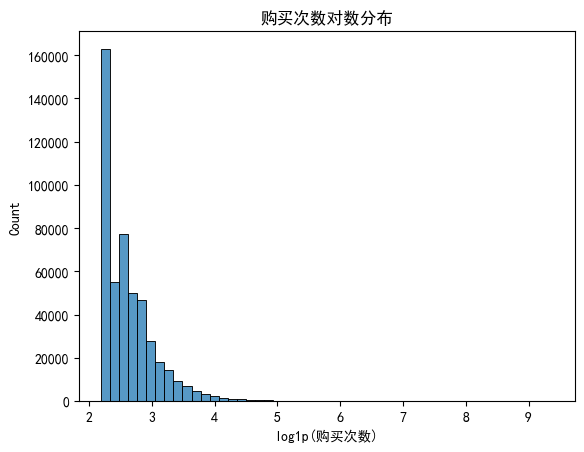

In [95]:
# 对数变换直方图（展示全量长尾）
sns.histplot(np.log1p(buy_counts['buy_count']), bins=50, kde=False)
plt.xlabel('log1p(购买次数)')
plt.title('购买次数对数分布');

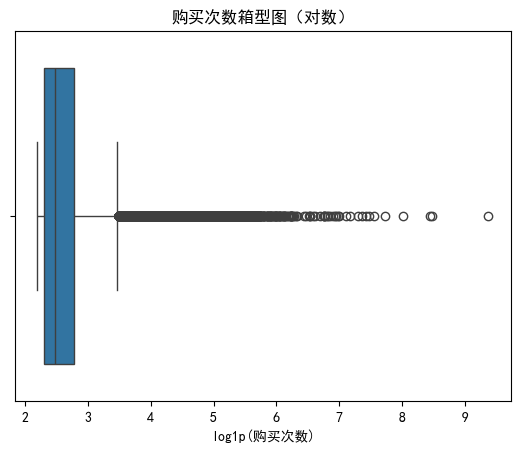

In [96]:
# 箱形图（对数尺度）
sns.boxplot(x=np.log1p(buy_counts['buy_count']))
plt.xlabel('log1p(购买次数)')
plt.title('购买次数箱型图（对数）');

##### 商品分析：目前假设大于"1000"次购买为爆款.

- 解商品被购买次数的分布情况

In [97]:
desc = item_buy_counts['item_buy_count'].describe(
    percentiles=[0.5, 0.75, 0.9, 0.95, 0.99,0.99995])
desc = desc.rename({
    'count': '商品数',
    'mean': '均值',
    'std': '标准差',
    'min': '最小值',
    'max': '最大值'
})
print(desc)

商品数       1852506.00
均值              3.77
标准差            32.91
最小值             1.00
50%             1.00
75%             2.00
90%             6.00
95%            11.00
99%            42.00
99.995%      1040.50
最大值         31625.00
Name: item_buy_count, dtype: float64


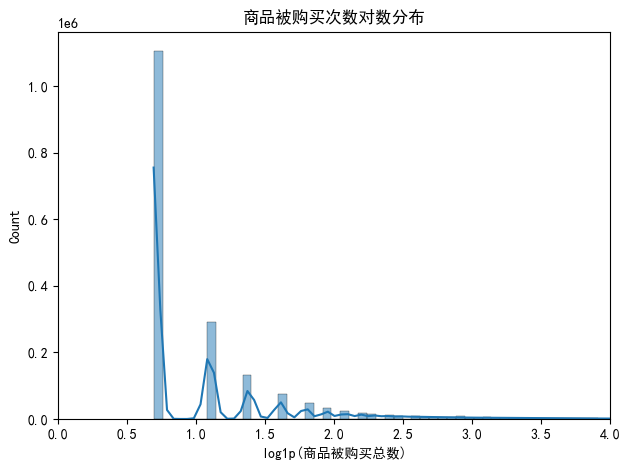

In [98]:
sns.histplot(np.log1p(
    item_buy_counts['item_buy_count']), bins=150, kde=True, edgecolor='black')
plt.xlim(0, 4)
plt.xlabel('log1p(商品被购买总数)')
plt.title('商品被购买次数对数分布')
plt.tight_layout()

- 查看被购买最多的前10个商品

In [99]:
print(item_buy_counts.sort_values('item_buy_count', ascending=False).head(100))

         item_id  item_buy_count
1846081  7493101           31625
124774    516873            9295
934891   3964264            9006
1849799  7557509            7253
1845528  7482805            7078
716056   3058048            6097
106380    426022            5627
429789   1872817            3770
104647    413606            3672
1483972  6162363            3585
144693    648691            3579
177522    797627            3449
1301431  5421409            3405
285189   1266501            3361
133819    584059            3248
980292   4163903            3115
206475    928637            3091
131246    564243            2910
1847425  7538392            2900
698543   2982899            2840
1847098  7533383            2812
212509    959326            2580
10504      34624            2399
1384909  5759221            2372
130993    560251            2296
1356258  5644811            2271
1290860  5378792            2269
1801150  7324348            2234
153665    691497            2153
594084   2

##### 订单量的时间趋势

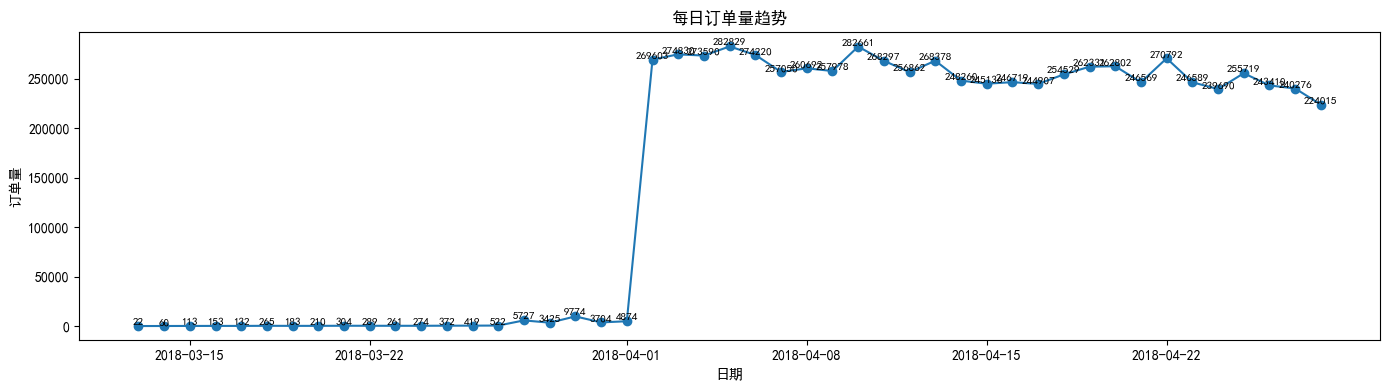

In [100]:
daily_orders = df_train.groupby(df_train['create_order_time'].dt.date).size()
plt.figure(figsize=(14, 4))
daily_orders.plot(marker='o')
plt.xlabel('日期')
plt.ylabel('订单量')
plt.title('每日订单量趋势')
plt.tight_layout()
for x, y in zip(daily_orders.index, daily_orders.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8,)
plt.show()

##### 用户首次/末次购买时间、购买间隔

In [101]:
user_time = df_train.groupby('buyer_admin_id')[
    'create_order_time'].agg(['min', 'max'])
user_time['活跃天数'] = (user_time['max'] - user_time['min']).dt.days

# 只看活跃天数的统计
print("用户活跃天数分布：")
print(user_time['活跃天数'].describe().rename({
    'count': '用户数',
    'mean': '平均活跃天数',
    'std': '标准差',
    'min': '最小值',
    '25%': '25%分位数',
    '50%': '中位数',
    '75%': '75%分位数',
    'max': '最大值'
}))

# 首次/末次购买时间的区间
print("\n首次购买时间区间：{} ~ {}".format(
    user_time['min'].min().strftime('%Y-%m-%d %H:%M:%S'),
    user_time['min'].max().strftime('%Y-%m-%d %H:%M:%S')
))
print("末次购买时间区间：{} ~ {}".format(
    user_time['max'].min().strftime('%Y-%m-%d %H:%M:%S'),
    user_time['max'].max().strftime('%Y-%m-%d %H:%M:%S')
))

用户活跃天数分布：
用户数      483117.00
平均活跃天数       12.25
标准差           8.44
最小值           0.00
25%分位数        4.00
中位数          13.00
75%分位数       20.00
最大值          45.00
Name: 活跃天数, dtype: float64

首次购买时间区间：2018-03-13 04:01:00 ~ 2018-04-28 23:58:04
末次购买时间区间：2018-03-17 11:13:41 ~ 2018-04-28 23:59:57


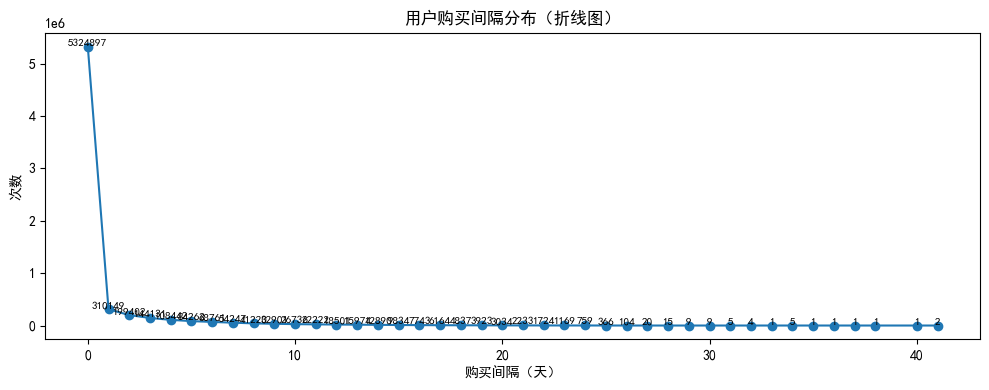

In [102]:
# 计算每个用户的购买间隔（天）
df_train = df_train.sort_values(['buyer_admin_id', 'create_order_time'])
df_train['prev_time'] = df_train.groupby(
    'buyer_admin_id')['create_order_time'].shift(1)
df_train['buy_gap'] = (df_train['create_order_time'] -
                       df_train['prev_time']).dt.days

# 统计每个间隔天数出现的次数
gap_counts = df_train['buy_gap'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
plt.plot(gap_counts.index, gap_counts.values, marker='o')
for x, y in zip(gap_counts.index, gap_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8)
plt.xlabel('购买间隔（天）')
plt.ylabel('次数')
plt.title('用户购买间隔分布（折线图）')
plt.tight_layout()
plt.show()